# TOPSIS Implementation – College Admission Dataset

**Name:** Niyati  
**Roll Number:** 102303356  
**Subject:** Predictive Analysis  

---

## Objective

To implement the TOPSIS (Technique for Order Preference by Similarity to Ideal Solution) method to rank students based on multiple quantitative criteria from a college admission dataset.


## Methodology

TOPSIS follows these steps:

1. Construct decision matrix
2. Normalize the matrix
3. Multiply by weights
4. Determine ideal best and ideal worst solutions
5. Calculate Euclidean distance from ideal best and worst
6. Compute TOPSIS score
7. Rank alternatives

Mathematically:

Normalization:
r_ij = x_ij / sqrt(sum(x_ij^2))

Topsis Score:
C_i = S_i- / (S_i+ + S_i-)

Where:
S_i+ = Distance from ideal best  
S_i- = Distance from ideal worst


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import files
uploaded = files.upload()


Saving college_numeric.csv to college_numeric.csv


In [3]:
data = pd.read_csv("college_numeric.csv")
data.head()


,student_id,age,entrance_score,board_percentage,extracurricular_score,admission_probability
0,250.99,17,30,95.58,2,0.387
1,250.99,20,0,75.45,2,0.221
2,250.99,19,120,75.36,10,0.446
3,250.99,18,179,52.49,2,0.174
4,250.99,18,295,92.48,7,0.634


In [4]:
# First column is alternative
alternatives = data.iloc[:, 0]

# Remaining columns are criteria
criteria = data.iloc[:, 1:].astype(float)

criteria.head()


,age,entrance_score,board_percentage,extracurricular_score,admission_probability
0,17.0,30.0,95.58,2.0,0.387
1,20.0,0.0,75.45,2.0,0.221
2,19.0,120.0,75.36,10.0,0.446
3,18.0,179.0,52.49,2.0,0.174
4,18.0,295.0,92.48,7.0,0.634


In [5]:
weights = np.array([1,1,1,1,1])  # Modify if needed
impacts = ['+','+','+','+','+']


In [6]:
norm_matrix = criteria / np.sqrt((criteria**2).sum())
norm_matrix.head()


,age,entrance_score,board_percentage,extracurricular_score,admission_probability
0,0.005804,0.001324,0.007912,0.002142,0.006916
1,0.006828,0.000000,0.006246,0.002142,0.003949
2,0.006486,0.005294,0.006238,0.010708,0.007970
3,0.006145,0.007897,0.004345,0.002142,0.003109
4,0.006145,0.013015,0.007655,0.007495,0.011330


In [7]:
weighted_matrix = norm_matrix * weights
weighted_matrix.head()


,age,entrance_score,board_percentage,extracurricular_score,admission_probability
0,0.005804,0.001324,0.007912,0.002142,0.006916
1,0.006828,0.000000,0.006246,0.002142,0.003949
2,0.006486,0.005294,0.006238,0.010708,0.007970
3,0.006145,0.007897,0.004345,0.002142,0.003109
4,0.006145,0.013015,0.007655,0.007495,0.011330


In [8]:
ideal_best = []
ideal_worst = []

for i in range(len(impacts)):
    if impacts[i] == '+':
        ideal_best.append(weighted_matrix.iloc[:, i].max())
        ideal_worst.append(weighted_matrix.iloc[:, i].min())
    else:
        ideal_best.append(weighted_matrix.iloc[:, i].min())
        ideal_worst.append(weighted_matrix.iloc[:, i].max())

ideal_best = np.array(ideal_best)
ideal_worst = np.array(ideal_worst)

ideal_best, ideal_worst


(array([0.00682773, 0.02797116, 0.0082388 , 0.01070763, 0.0130632 ]),
 array([0.00580357, 0.        , 0.00417528, 0.        , 0.00075036]))

In [9]:
dist_best = np.sqrt(((weighted_matrix - ideal_best) ** 2).sum(axis=1))
dist_worst = np.sqrt(((weighted_matrix - ideal_worst) ** 2).sum(axis=1))


In [10]:
topsis_score = dist_worst / (dist_best + dist_worst)

data['Topsis Score'] = topsis_score
data['Rank'] = topsis_score.rank(method='max', ascending=False)

data.head()


,student_id,age,entrance_score,board_percentage,extracurricular_score,admission_probability,Topsis Score,Rank
0,250.99,17,30,95.58,2,0.387,0.210282,16123.0
1,250.99,20,0,75.45,2,0.221,0.127558,21984.0
2,250.99,19,120,75.36,10,0.446,0.377123,3106.0
3,250.99,18,179,52.49,2,0.174,0.259603,11553.0
4,250.99,18,295,92.48,7,0.634,0.548053,1087.0


## Result Interpretation

- Higher TOPSIS score indicates better overall performance.
- Rank 1 corresponds to the best candidate.
- The ranking considers all criteria simultaneously.


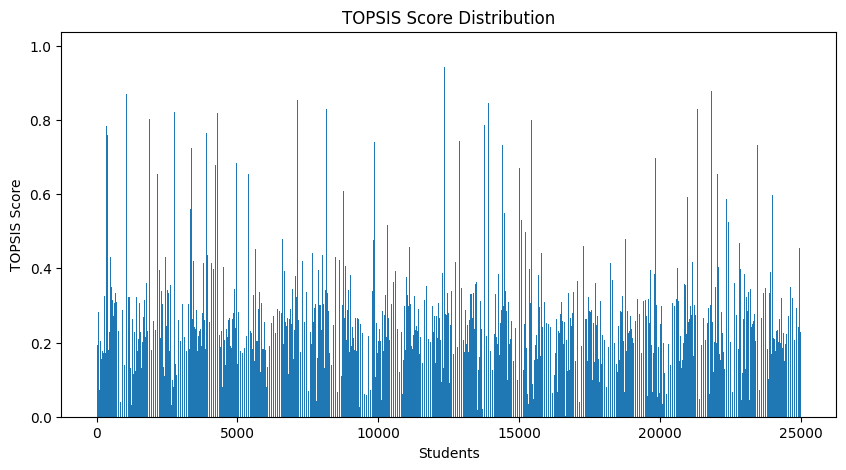

In [11]:
plt.figure(figsize=(10,5))
plt.bar(range(len(topsis_score)), topsis_score)
plt.title("TOPSIS Score Distribution")
plt.xlabel("Students")
plt.ylabel("TOPSIS Score")
plt.show()


In [12]:
data.to_csv("result.csv", index=False)


## Conclusion

The TOPSIS method successfully ranks students based on multiple criteria.

It provides a mathematical decision-support system that considers:
- Academic performance
- Entrance scores
- Extracurricular activity
- Admission probability

Thus, TOPSIS helps in objective multi-criteria decision making.
